## xG difference

_________________________

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
warnings.filterwarnings("ignore")

from highlight_text.htext import fig_text, ax_text

In [58]:
df = pd.read_csv('understat_all.csv')
# pd.set_option('display.max_rows', None)

In [59]:
# check data types
df.dtypes

id                 int64
isResult            bool
datetime          object
h_id               int64
h_title           object
h_short_title     object
a_id               int64
a_title           object
a_short_title     object
goals_h            int64
goals_a            int64
xG_h             float64
xG_a             float64
forecast_w       float64
forecast_d       float64
forecast_l       float64
dtype: object

In [60]:
# convertin each matchup into two rows
## one where each team is 'current team' and opponent is identified
df['H'] = df['h_title']
df['A'] = df['a_title']
cols_to_keep = ['datetime','h_title','a_title','goals_h','goals_a','xG_h','xG_a']

team_results = pd.melt(
    df,
    id_vars=cols_to_keep,
    value_vars=['H','A'],
    var_name='Home/Away',
    value_name='Team')

team_results['Opponent'] = np.where(team_results['Team'] == team_results['h_title'],
                                   team_results['a_title'],
                                   team_results['h_title'])

In [61]:
team_results.head()

,datetime,h_title,a_title,goals_h,goals_a,xG_h,xG_a,Home/Away,Team,Opponent
0,2017-08-11 19:45:00,Arsenal,Leicester,4,3,2.54329,1.464950,H,Arsenal,Leicester
1,2017-09-09 15:00:00,Arsenal,Bournemouth,3,0,2.48732,0.577291,H,Arsenal,Bournemouth
2,2017-09-25 20:00:00,Arsenal,West Bromwich Albion,2,0,2.39316,0.766652,H,Arsenal,West Bromwich Albion
3,2017-10-01 12:00:00,Arsenal,Brighton,2,0,2.47818,0.386343,H,Arsenal,Brighton
4,2017-10-28 15:00:00,Arsenal,Swansea,2,1,2.37777,0.835500,H,Arsenal,Swansea


In [62]:
# full time goals
team_results['Goals'] = np.where(team_results['Team'] == team_results['h_title'],
                                 team_results['goals_h'],
                                 team_results['goals_a'])
team_results['Goals Opp'] = np.where(team_results['Team'] != team_results['h_title'],
                                     team_results['goals_h'],
                                     team_results['goals_a'])
team_results['xG'] = np.where(team_results['Team'] == team_results['h_title'],
                                 team_results['xG_h'],
                                 team_results['xG_a'])
team_results['xG Opp'] = np.where(team_results['Team'] != team_results['h_title'],
                                     team_results['xG_h'],
                                     team_results['xG_a'])

In [63]:
team_results.head()

,datetime,h_title,a_title,goals_h,goals_a,xG_h,xG_a,Home/Away,Team,Opponent,Goals,Goals Opp,xG,xG Opp
0,2017-08-11 19:45:00,Arsenal,Leicester,4,3,2.54329,1.464950,H,Arsenal,Leicester,4,3,2.54329,1.464950
1,2017-09-09 15:00:00,Arsenal,Bournemouth,3,0,2.48732,0.577291,H,Arsenal,Bournemouth,3,0,2.48732,0.577291
2,2017-09-25 20:00:00,Arsenal,West Bromwich Albion,2,0,2.39316,0.766652,H,Arsenal,West Bromwich Albion,2,0,2.39316,0.766652
3,2017-10-01 12:00:00,Arsenal,Brighton,2,0,2.47818,0.386343,H,Arsenal,Brighton,2,0,2.47818,0.386343
4,2017-10-28 15:00:00,Arsenal,Swansea,2,1,2.37777,0.835500,H,Arsenal,Swansea,2,1,2.37777,0.835500


In [64]:
gd = team_results.loc[(team_results.Team=='Arsenal')]
gd.head()

,datetime,h_title,a_title,goals_h,goals_a,xG_h,xG_a,Home/Away,Team,Opponent,Goals,Goals Opp,xG,xG Opp
0,2017-08-11 19:45:00,Arsenal,Leicester,4,3,2.54329,1.464950,H,Arsenal,Leicester,4,3,2.54329,1.464950
1,2017-09-09 15:00:00,Arsenal,Bournemouth,3,0,2.48732,0.577291,H,Arsenal,Bournemouth,3,0,2.48732,0.577291
2,2017-09-25 20:00:00,Arsenal,West Bromwich Albion,2,0,2.39316,0.766652,H,Arsenal,West Bromwich Albion,2,0,2.39316,0.766652
3,2017-10-01 12:00:00,Arsenal,Brighton,2,0,2.47818,0.386343,H,Arsenal,Brighton,2,0,2.47818,0.386343
4,2017-10-28 15:00:00,Arsenal,Swansea,2,1,2.37777,0.835500,H,Arsenal,Swansea,2,1,2.37777,0.835500


In [65]:
gd.dtypes

datetime      object
h_title       object
a_title       object
goals_h        int64
goals_a        int64
xG_h         float64
xG_a         float64
Home/Away     object
Team          object
Opponent      object
Goals          int64
Goals Opp      int64
xG           float64
xG Opp       float64
dtype: object

In [66]:
# gd['Goals']=gd['Goals'].astype(int)
# gd['Goals Opp']=gd['Goals Opp'].astype(int)

In [67]:
# Sort column with name Date
gd = gd.sort_values(by = 'datetime')
gd.head(3)

,datetime,h_title,a_title,goals_h,goals_a,xG_h,xG_a,Home/Away,Team,Opponent,Goals,Goals Opp,xG,xG Opp
57,2016-08-14 19:00:00,Arsenal,Liverpool,3,4,1.181970,1.659100,H,Arsenal,Liverpool,3,4,1.181970,1.659100
198,2016-08-20 20:30:00,Leicester,Arsenal,0,0,0.553693,0.521509,A,Arsenal,Leicester,0,0,0.521509,0.553693
199,2016-08-27 18:00:00,Watford,Arsenal,1,3,1.077750,2.032710,A,Arsenal,Watford,3,1,2.032710,1.077750


In [68]:
gd['gd'] = gd['Goals']-gd['Goals Opp']
gd['xgd'] = gd['xG']-gd['xG Opp']

In [69]:
gd.head()

,datetime,h_title,a_title,goals_h,goals_a,xG_h,xG_a,Home/Away,Team,Opponent,Goals,Goals Opp,xG,xG Opp,gd,xgd
57,2016-08-14 19:00:00,Arsenal,Liverpool,3,4,1.181970,1.659100,H,Arsenal,Liverpool,3,4,1.181970,1.659100,-1,-0.477130
198,2016-08-20 20:30:00,Leicester,Arsenal,0,0,0.553693,0.521509,A,Arsenal,Leicester,0,0,0.521509,0.553693,0,-0.032184
199,2016-08-27 18:00:00,Watford,Arsenal,1,3,1.077750,2.032710,A,Arsenal,Watford,3,1,2.032710,1.077750,2,0.954960
58,2016-09-10 18:00:00,Arsenal,Southampton,2,1,1.892190,1.175220,H,Arsenal,Southampton,2,1,1.892190,1.175220,1,0.716970
200,2016-09-17 18:00:00,Hull,Arsenal,1,4,0.969693,3.634530,A,Arsenal,Hull,4,1,3.634530,0.969693,3,2.664837


In [70]:
gd = gd[['datetime','Team','Opponent','Goals','Goals Opp','xG','xG Opp','gd','xgd']]

In [71]:
gd

,datetime,Team,Opponent,Goals,Goals Opp,xG,xG Opp,gd,xgd
57,2016-08-14 19:00:00,Arsenal,Liverpool,3,4,1.181970,1.659100,-1,-0.477130
198,2016-08-20 20:30:00,Arsenal,Leicester,0,0,0.521509,0.553693,0,-0.032184
199,2016-08-27 18:00:00,Arsenal,Watford,3,1,2.032710,1.077750,2,0.954960
58,2016-09-10 18:00:00,Arsenal,Southampton,2,1,1.892190,1.175220,1,0.716970
200,2016-09-17 18:00:00,Arsenal,Hull,4,1,3.634530,0.969693,3,2.664837
...,...,...,...,...,...,...,...,...,...
157,2020-10-04 13:00:00,Arsenal,Sheffield United,2,1,0.667131,0.144994,1,0.522137
257,2020-10-17 16:30:00,Arsenal,Manchester City,0,1,0.838322,1.430230,-1,-0.591908
158,2020-10-25 19:15:00,Arsenal,Leicester,0,1,0.739440,0.736172,-1,0.003268
258,2020-11-01 16:30:00,Arsenal,Manchester United,1,0,0.998072,0.394113,1,0.603959


In [72]:
#Convert time data to a datetime object
gd['datetime'] = pd.to_datetime(gd['datetime'])
#Set datetime to index the DataFrame
gd = gd.set_index('datetime')

In [73]:
# date_ticks = gd.index.to_pydatetime()

In [74]:
rolling_gd = gd[['gd']].resample('W').sum()
rolling_xg = gd[['xgd']].resample('W').sum()

In [75]:
rolling_gd = rolling_gd.rolling(window=6, center=True).mean()
rolling_xg = rolling_xg.rolling(window=6, center=True).mean()

In [76]:
date_ticks = rolling_xg.index.to_pydatetime()

In [77]:
psb = pd.merge(rolling_gd, rolling_xg, how='left', on=['datetime'])

In [78]:
import matplotlib.dates as mdates

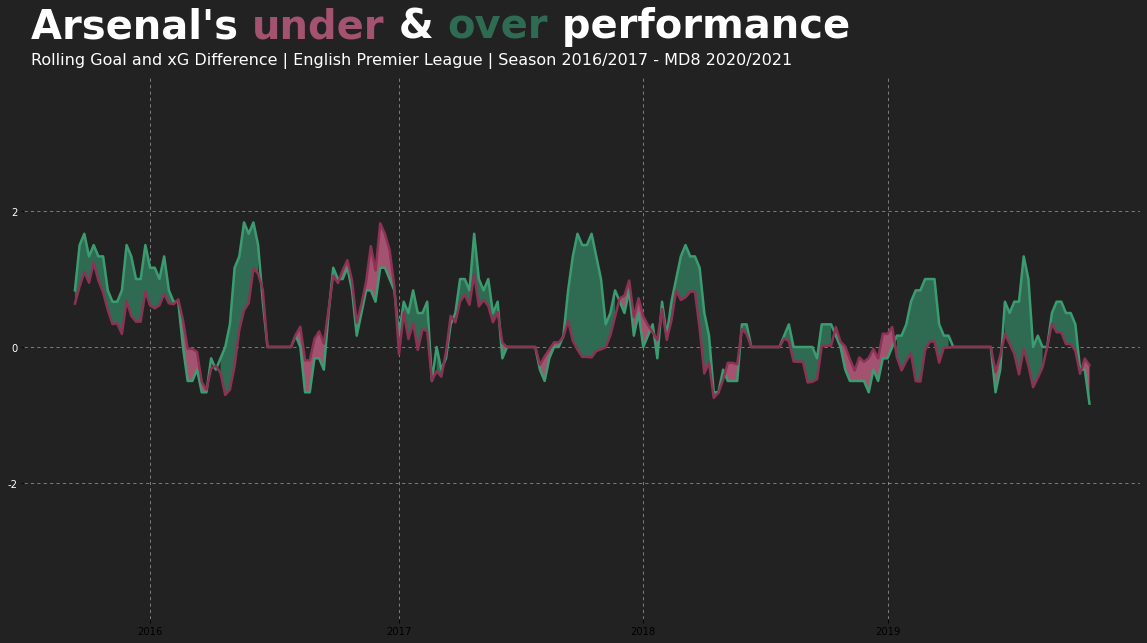

In [87]:
plot_font = "BBC Reith Sans"
bg = "#222222"
xg_line = '#3c9c71'
xg_fill = '#2f6b52'
gd_line = '#8b3255'
gd_fill = '#a35370'

fig, ax = plt.subplots(figsize=(20,10))
rect = ax.patch
rect.set_facecolor(bg)

#set figure background colour
fig.set_facecolor(bg)


#set and place ticks on main viz
yt = [-2,0,2]
# xt = [0,1,2,3,4,5]
ylabels = ["-2","0","2"]
# xlabels = ["10","20","30","40","50"]
ax.set_yticks(yt)
# ax.set_xticks(xt)
ax.set_yticklabels(ylabels,color="white")
# ax.set_xticklabels(xlabels,color="white")

####EVERYTHING I"VE CHANGED IS IN THE NEXT 5 LINES ONLY
###hacky way to just loop over your date_ticks and pick the ones where season changes and only plot those
axes_date_ticks = [] ##ones to plot
for i in range(len(date_ticks)-1):
    if date_ticks[i].year != date_ticks[i+1].year:
        axes_date_ticks.append(date_ticks[i])
        
ax.set_xticks(axes_date_ticks) ##plot the selected datetimes
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y")) ##formats the datetime object to just show year

# ax.axvline(x=500)

ax.set_ylim(-4,4)

#add gridlines to viz
ax.grid(zorder=1,color="white",alpha=0.5,ls='--', dashes=(4, 4))

ax.plot(date_ticks, psb['gd'], alpha=1, lw=2.5, color=xg_line,zorder=2)
ax.plot(date_ticks, psb['xgd'], alpha=1, lw=2.5, color=gd_line,zorder=2)

ax.fill_between(date_ticks, psb['xgd'], psb['gd'], where=psb['gd'] >= psb['xgd'], facecolor=xg_fill, interpolate=False, zorder=2)
ax.fill_between(date_ticks, psb['xgd'], psb['gd'], where=psb['xgd'] >= psb['gd'], facecolor=gd_fill, interpolate=True, zorder=2)

spines = ["top","right","bottom","left"]
for s in spines:
    ax.spines[s].set_visible(False)



fig_text(0.13,0.92, s = "Arsenal's <under> & <over> performance",color = 'white',
         highlight_colors = [gd_fill, xg_fill],size=40,fontweight='bold',highlight_weights='bold',fontfamily=plot_font)
fig_text(0.13,0.89, "Rolling Goal and xG Difference | English Premier League | Season 2016/2017 - MD8 2020/2021",color="w",
        fontfamily=plot_font, size=16);

In [85]:
axes_date_ticks

[datetime.datetime(2016, 12, 25, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 30, 0, 0),
 datetime.datetime(2019, 12, 29, 0, 0)]